<a href="https://colab.research.google.com/github/jinocryst/data-analysis-with-pandas/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EC%A4%91%EA%B0%84%EA%B3%BC%EC%A0%9C%EB%AC%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



# 오픈소스 기반 데이터 분석 - 중간과제물


### 1-2 Python을 사용하여 API를 호출하는 코드를 작성하고, 2015년 1월부터 2024년 12월까지의 개인 유형의 현년 전기, 가스, 수도, 지역난방 에너지 사용량 데이터를 수집하는 프로그램을 작성하시오. API 호출 성공을 확인할 수 있는 실행 결과를 캡처하여 첨부하시오.

In [22]:
import requests
import json


responses = []    # API Request json 수집용 리스트

def get_year_months():
  year_months = []
  for year in range(2015, 2024+1):
    for month in range(1,12+1):
      year_months.append(f'{year}{month:02d}')

  #print("생성된 연도-월 목록:")
  #print(year_months)
  #print(f"총 {len(year_months)}개 (2015.01 ~ 2024.12)")
  return year_months

def get_responses():

  # 기간중의 모든 응답결과 중 list_total_count 체크한 결과 7이였으므로 , 5보다 큰 10으로 변경하였음
  base_url = f'http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/10'

  success_count = 0 # API Request 성공건수
  fail_count = 0    # API Request 실패건수

  for year_month in get_year_months():
    url = f'{base_url}/{year_month[:4]}/{year_month[4:]}'

    try:
      response = requests.get(url)
      response.raise_for_status()
      data = response.json()

      responses.append(data)
      # print(f"{year_month} 데이터 수집 완료")

    except requests.exceptions.RequestException as e:
      print(f"{year_month} API 호출 실패: {e}")
    except json.JSONDecodeError as e:
      print(f"{year_month} JSON 파싱 실패: {e}")

    if response.status_code == 200:
      # print("api 호출 성공")
      # print(response.json())
      success_count += 1
    else:
      # print(f"API 호출 실패: {response.status_code}")
      fail_count += 1

  # 결과 확인용
  if responses:

      # 전체 결과들의 list_total_count 값 확인하여 파라미터변경 필요여부 확인코드(모든 결과가 7건씩이였음)
      # total_counts = [
      # r.get('energyUseDataSummaryInfo', {}).get('list_total_count', None)
      #   for r in responses
      # ]
      # print("list_total_count 목록:", total_counts)
    print(f"총 요청 수: {len(responses)}건")
    print(f"성공 건수: {success_count}건")
    print(f"실패 건수: {fail_count}건")

    return responses


def main():

    personal_data = []
    responses = get_responses()
    for r in responses:
      info = r.get("energyUseDataSummaryInfo", {})
      result = info.get("RESULT", {})
      code = result.get("CODE", "UNKNOWN")

      if code == "INFO-000":  # 정상인경우
        rows = info.get("row", [])
        for row in rows:
          # 개인 유형만 추출
          if row.get("MM_TYPE") == "개인":
              personal_data.append({
                  "YEAR": row.get("YEAR"),
                  "MON": row.get("MON"),
                  "EUS": row.get("EUS"),  #전기사용량(EUS)
                  "GUS": row.get("GUS"),  #가스사용량(GUS)
                  "WUS": row.get("WUS"),  #수도사용량(WUS)
                  "HUS": row.get("HUS"),  #지역난방(HUS)
              })
      else:
        print

    # 결과 출력
    print(f"‘개인’ 유형 데이터 수집 성공 건수: {len(personal_data)}건\n") # 기대치 120건
    for i, data in enumerate(personal_data, start=1):
      print(f"[{i}] [{data['YEAR']}년 {data['MON']}월] 전기사용량(EUS): {data['EUS']} , 가스사용량(GUS): {data['GUS']} , 수도사용량(WUS): {data['WUS']} , 지역난방(HUS): {data['HUS']}")


if __name__ == "__main__":
    main()

총 요청 수: 120건
성공 건수: 120건
실패 건수: 0건
‘개인’ 유형 데이터 수집 성공 건수: 120건

[1] [2015년 01월] 전기사용량(EUS): 193784708 , 가스사용량(GUS): 59133720 , 수도사용량(WUS): 12819757.886 , 지역난방(HUS): 22740838.937
[2] [2015년 02월] 전기사용량(EUS): 189974230 , 가스사용량(GUS): 56487358 , 수도사용량(WUS): 12656888.218 , 지역난방(HUS): 18793320.213
[3] [2015년 03월] 전기사용량(EUS): 175215719 , 가스사용량(GUS): 49984873 , 수도사용량(WUS): 12655474.249 , 지역난방(HUS): 13826348.508
[4] [2015년 04월] 전기사용량(EUS): 183891769 , 가스사용량(GUS): 37306841 , 수도사용량(WUS): 12954773.246 , 지역난방(HUS): 5836002.885
[5] [2015년 05월] 전기사용량(EUS): 177289769 , 가스사용량(GUS): 22060892 , 수도사용량(WUS): 13086734.214 , 지역난방(HUS): 1320895.801
[6] [2015년 06월] 전기사용량(EUS): 186073153 , 가스사용량(GUS): 12677645 , 수도사용량(WUS): 14241651.402 , 지역난방(HUS): 294312.634
[7] [2015년 07월] 전기사용량(EUS): 165114568 , 가스사용량(GUS): 8893640 , 수도사용량(WUS): 12083879.038 , 지역난방(HUS): 702863.645
[8] [2015년 08월] 전기사용량(EUS): 242000479 , 가스사용량(GUS): 7619018 , 수도사용량(WUS): 15164553.742 , 지역난방(HUS): 460288.965
[9] [2015년 09월] 전기사용량(EUS): 2075408

### 2-1 수집한 JSON 형태의 데이터를 pandas DataFrame으로 변환하고, 데이터의 기본 정보를 출력하는 코드와 실행 결과를 첨부하시오.



In [31]:
import requests
import json
import pandas as pd


responses = []    # API Request json 수집용 리스트

def get_year_months():
  year_months = []
  for year in range(2015, 2024+1):
    for month in range(1,12+1):
      year_months.append(f'{year}{month:02d}')

  #print("생성된 연도-월 목록:")
  #print(year_months)
  #print(f"총 {len(year_months)}개 (2015.01 ~ 2024.12)")
  return year_months

def get_responses():

  # 기간중의 모든 응답결과 중 list_total_count 체크한 결과 7이였으므로 , 5보다 큰 10으로 변경하였음
  base_url = f'http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/10'

  success_count = 0 # API Request 성공건수
  fail_count = 0    # API Request 실패건수

  for year_month in get_year_months():
    url = f'{base_url}/{year_month[:4]}/{year_month[4:]}'

    try:
      response = requests.get(url)
      response.raise_for_status()
      data = response.json()

      responses.append(data)
      # print(f"{year_month} 데이터 수집 완료")

    except requests.exceptions.RequestException as e:
      print(f"{year_month} API 호출 실패: {e}")
    except json.JSONDecodeError as e:
      print(f"{year_month} JSON 파싱 실패: {e}")

    if response.status_code == 200:
      # print("api 호출 성공")
      # print(response.json())
      success_count += 1
    else:
      # print(f"API 호출 실패: {response.status_code}")
      fail_count += 1

  # 결과 확인용
  if responses:

      # 전체 결과들의 list_total_count 값 확인하여 파라미터변경 필요여부 확인코드(모든 결과가 7건씩이였음)
      # total_counts = [
      # r.get('energyUseDataSummaryInfo', {}).get('list_total_count', None)
      #   for r in responses
      # ]
      # print("list_total_count 목록:", total_counts)
    print(f"총 요청 수: {len(responses)}건")
    print(f"성공 건수: {success_count}건")
    print(f"실패 건수: {fail_count}건")

    return responses


def main():

    personal_data = []
    # responses = get_responses()
    with open('APIdata.json', 'r', encoding='utf-8') as f:
      responses = json.load(f)
    for r in responses:
      info = r.get("energyUseDataSummaryInfo", {})
      result = info.get("RESULT", {})
      code = result.get("CODE", "UNKNOWN")

      if code == "INFO-000":  # 정상인경우
        rows = info.get("row", [])
        for row in rows:
          # 개인 유형만 추출
          if row.get("MM_TYPE") == "개인":
              personal_data.append({
                  "YEAR": row.get("YEAR"),
                  "MON": row.get("MON"),
                  "EUS": row.get("EUS"),  #전기사용량(EUS)
                  "GUS": row.get("GUS"),  #가스사용량(GUS)
                  "WUS": row.get("WUS"),  #수도사용량(WUS)
                  "HUS": row.get("HUS"),  #지역난방(HUS)
              })
      else:
        print

    # 결과 출력
    print(f"‘개인’ 유형 데이터 수집 성공 건수: {len(personal_data)}건\n") # 기대치 120건

    # DataFrame 변환
    df = pd.DataFrame(personal_data)
    print(df)

if __name__ == "__main__":
    main()

‘개인’ 유형 데이터 수집 성공 건수: 120건

     YEAR MON        EUS       GUS           WUS           HUS
0    2015  01  193784708  59133720  12819757.886  22740838.937
1    2015  02  189974230  56487358  12656888.218  18793320.213
2    2015  03  175215719  49984873  12655474.249  13826348.508
3    2015  04  183891769  37306841  12954773.246   5836002.885
4    2015  05  177289769  22060892  13086734.214   1320895.801
..    ...  ..        ...       ...           ...           ...
115  2024  08  463971328   7072251    15873544.6    130082.263
116  2024  09  409872908   5729131    15143321.6   3420507.136
117  2024  10  282268119   8233421    15297669.9   2695491.396
118  2024  11  257927956  17418221    14678672.5   8836296.454
119  2024  12  134828126  42103424     7326853.6   1513199.277

[120 rows x 6 columns]


### 2-2 연도별, 계절별 분석을 위해 날짜 컬럼을 활용하여 연도(year)와 계절(season) 컬럼을 추가하는 전처리 코드를 작성하고, 변환 결과를 확인할 수 있는 출력 결과를 첨부하시오. ※ 계절 구분: 봄(3-5월), 여름(6-8월), 가을(9-11월), 겨울(12-2월) (4점)

In [34]:
import requests
import json
import pandas as pd


responses = []    # API Request json 수집용 리스트

def get_year_months():
  year_months = []
  for year in range(2015, 2024+1):
    for month in range(1,12+1):
      year_months.append(f'{year}{month:02d}')

  #print("생성된 연도-월 목록:")
  #print(year_months)
  #print(f"총 {len(year_months)}개 (2015.01 ~ 2024.12)")
  return year_months

def get_responses():

  # 기간중의 모든 응답결과 중 list_total_count 체크한 결과 7이였으므로 , 5보다 큰 10으로 변경하였음
  base_url = f'http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/10'

  success_count = 0 # API Request 성공건수
  fail_count = 0    # API Request 실패건수

  for year_month in get_year_months():
    url = f'{base_url}/{year_month[:4]}/{year_month[4:]}'

    try:
      response = requests.get(url)
      response.raise_for_status()
      data = response.json()

      responses.append(data)
      # print(f"{year_month} 데이터 수집 완료")

    except requests.exceptions.RequestException as e:
      print(f"{year_month} API 호출 실패: {e}")
    except json.JSONDecodeError as e:
      print(f"{year_month} JSON 파싱 실패: {e}")

    if response.status_code == 200:
      # print("api 호출 성공")
      # print(response.json())
      success_count += 1
    else:
      # print(f"API 호출 실패: {response.status_code}")
      fail_count += 1

  # 결과 확인용
  if responses:

      # 전체 결과들의 list_total_count 값 확인하여 파라미터변경 필요여부 확인코드(모든 결과가 7건씩이였음)
      # total_counts = [
      # r.get('energyUseDataSummaryInfo', {}).get('list_total_count', None)
      #   for r in responses
      # ]
      # print("list_total_count 목록:", total_counts)
    print(f"총 요청 수: {len(responses)}건")
    print(f"성공 건수: {success_count}건")
    print(f"실패 건수: {fail_count}건")

    return responses


def main():

    personal_data = []
    # responses = get_responses()
    with open('APIdata.json', 'r', encoding='utf-8') as f:
      responses = json.load(f)
    for r in responses:
      info = r.get("energyUseDataSummaryInfo", {})
      result = info.get("RESULT", {})
      code = result.get("CODE", "UNKNOWN")

      if code == "INFO-000":  # 정상인경우
        rows = info.get("row", [])
        for row in rows:
          # 개인 유형만 추출
          if row.get("MM_TYPE") == "개인":
              personal_data.append({
                  "YEAR": row.get("YEAR"),
                  "MON": row.get("MON"),
                  "EUS": row.get("EUS"),  #전기사용량(EUS)
                  "GUS": row.get("GUS"),  #가스사용량(GUS)
                  "WUS": row.get("WUS"),  #수도사용량(WUS)
                  "HUS": row.get("HUS"),  #지역난방(HUS)
              })
      else:
        print

    # 결과 출력
    print(f"‘개인’ 유형 데이터 수집 성공 건수: {len(personal_data)}건\n") # 기대치 120건

    # DataFrame 변환
    df = pd.DataFrame(personal_data)
    # 계절추가
    df['season'] = df['MON'].apply(get_season)
    print(df)


# 계절 함수
def get_season(month):
  if month in ['03', '04', '05']:
      return '봄'
  elif month in ['06', '07', '08']:
      return '여름'
  elif month in ['09', '10', '11']:
      return '가을'
  else:  # '12', '01', '02'
      return '겨울'

if __name__ == "__main__":
    main()

‘개인’ 유형 데이터 수집 성공 건수: 120건

     YEAR MON        EUS       GUS           WUS           HUS season
0    2015  01  193784708  59133720  12819757.886  22740838.937     겨울
1    2015  02  189974230  56487358  12656888.218  18793320.213     겨울
2    2015  03  175215719  49984873  12655474.249  13826348.508      봄
3    2015  04  183891769  37306841  12954773.246   5836002.885      봄
4    2015  05  177289769  22060892  13086734.214   1320895.801      봄
..    ...  ..        ...       ...           ...           ...    ...
115  2024  08  463971328   7072251    15873544.6    130082.263     여름
116  2024  09  409872908   5729131    15143321.6   3420507.136     가을
117  2024  10  282268119   8233421    15297669.9   2695491.396     가을
118  2024  11  257927956  17418221    14678672.5   8836296.454     가을
119  2024  12  134828126  42103424     7326853.6   1513199.277     겨울

[120 rows x 7 columns]


### 3-1

In [37]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,313 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and dire

‘개인’ 유형 데이터 수집 성공 건수: 120건

   YEAR  total_energy
0  2015  2.899817e+09
1  2016  3.259907e+09
2  2017  3.409270e+09
3  2018  3.682193e+09
4  2019  3.790736e+09
5  2020  3.906168e+09
6  2021  4.105176e+09
7  2022  4.132556e+09
8  2023  4.120742e+09
9  2024  4.132734e+09


/tmp/ipython-input-442602394.py:158: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-442602394.py:158: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-442602394.py:158: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-442602394.py:158: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-442602394.py:158: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-442602394.py:158: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-442602394.py:158: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/t

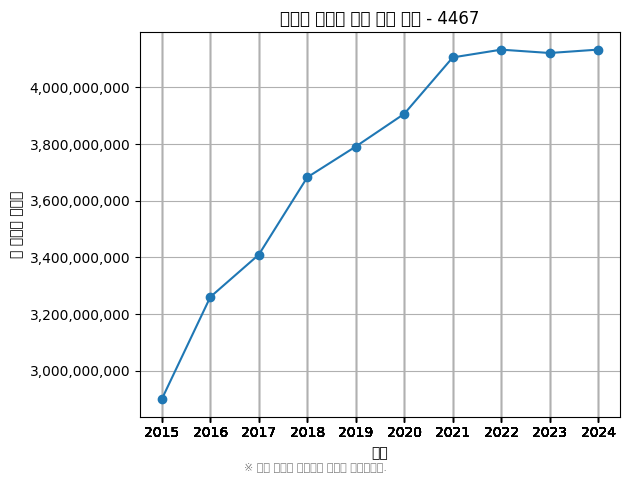

     YEAR MON        EUS       GUS           WUS           HUS season  \
0    2015  01  193784708  59133720  12819757.886  22740838.937     겨울   
1    2015  02  189974230  56487358  12656888.218  18793320.213     겨울   
2    2015  03  175215719  49984873  12655474.249  13826348.508      봄   
3    2015  04  183891769  37306841  12954773.246   5836002.885      봄   
4    2015  05  177289769  22060892  13086734.214   1320895.801      봄   
..    ...  ..        ...       ...           ...           ...    ...   
115  2024  08  463971328   7072251    15873544.6    130082.263     여름   
116  2024  09  409872908   5729131    15143321.6   3420507.136     가을   
117  2024  10  282268119   8233421    15297669.9   2695491.396     가을   
118  2024  11  257927956  17418221    14678672.5   8836296.454     가을   
119  2024  12  134828126  42103424     7326853.6   1513199.277     겨울   

     total_energy  
0    2.884790e+08  
1    2.779118e+08  
2    2.516824e+08  
3    2.399894e+08  
4    2.137583e+08  
.. 

In [52]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


responses = []    # API Request json 수집용 리스트

def get_year_months():
  year_months = []
  for year in range(2015, 2024+1):
    for month in range(1,12+1):
      year_months.append(f'{year}{month:02d}')

  #print("생성된 연도-월 목록:")
  #print(year_months)
  #print(f"총 {len(year_months)}개 (2015.01 ~ 2024.12)")
  return year_months

def get_responses():

  # 기간중의 모든 응답결과 중 list_total_count 체크한 결과 7이였으므로 , 5보다 큰 10으로 변경하였음
  base_url = f'http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/10'

  success_count = 0 # API Request 성공건수
  fail_count = 0    # API Request 실패건수

  for year_month in get_year_months():
    url = f'{base_url}/{year_month[:4]}/{year_month[4:]}'

    try:
      response = requests.get(url)
      response.raise_for_status()
      data = response.json()

      responses.append(data)
      # print(f"{year_month} 데이터 수집 완료")

    except requests.exceptions.RequestException as e:
      print(f"{year_month} API 호출 실패: {e}")
    except json.JSONDecodeError as e:
      print(f"{year_month} JSON 파싱 실패: {e}")

    if response.status_code == 200:
      # print("api 호출 성공")
      # print(response.json())
      success_count += 1
    else:
      # print(f"API 호출 실패: {response.status_code}")
      fail_count += 1

  # 결과 확인용
  if responses:

      # 전체 결과들의 list_total_count 값 확인하여 파라미터변경 필요여부 확인코드(모든 결과가 7건씩이였음)
      # total_counts = [
      # r.get('energyUseDataSummaryInfo', {}).get('list_total_count', None)
      #   for r in responses
      # ]
      # print("list_total_count 목록:", total_counts)
    print(f"총 요청 수: {len(responses)}건")
    print(f"성공 건수: {success_count}건")
    print(f"실패 건수: {fail_count}건")

    return responses


def main():

    personal_data = []
    # responses = get_responses()
    with open('APIdata.json', 'r', encoding='utf-8') as f:
      responses = json.load(f)
    for r in responses:
      info = r.get("energyUseDataSummaryInfo", {})
      result = info.get("RESULT", {})
      code = result.get("CODE", "UNKNOWN")

      if code == "INFO-000":  # 정상인경우
        rows = info.get("row", [])
        for row in rows:
          # 개인 유형만 추출
          if row.get("MM_TYPE") == "개인":
              personal_data.append({
                  "YEAR": row.get("YEAR"),
                  "MON": row.get("MON"),
                  "EUS": row.get("EUS"),  #전기사용량(EUS)
                  "GUS": row.get("GUS"),  #가스사용량(GUS)
                  "WUS": row.get("WUS"),  #수도사용량(WUS)
                  "HUS": row.get("HUS"),  #지역난방(HUS)
              })
      else:
        print


    print(f"‘개인’ 유형 데이터 수집 성공 건수: {len(personal_data)}건\n") # 기대치 120건

    # DataFrame 변환
    df = pd.DataFrame(personal_data)
    # 계절추가
    df['season'] = df['MON'].apply(get_season)

    # 선그래프 생성
    create_line_plot(df)

    # 결과 출력
    print(df)


# 계절 함수
def get_season(month):
  if month in ['03', '04', '05']:
      return '봄'
  elif month in ['06', '07', '08']:
      return '여름'
  elif month in ['09', '10', '11']:
      return '가을'
  else:  # '12', '01', '02'
      return '겨울'

# 연도별 에너지 사용 총 사용량(전기+가스+수도+지역난방) 변화량을 선 그래프로 시각화
def create_line_plot(df):
  student_id_last4 = "4467"  # 자신의 학번 뒤 4자리

  df['YEAR'] = df['YEAR'].astype(int)
  # 총 사용량
  df['total_energy'] = (df['EUS'].astype(float) +
                      df['GUS'].astype(float) +
                      df['WUS'].astype(float) +
                      df['HUS'].astype(float))
  # 연도별 합산
  yearly_total = df.groupby('YEAR')['total_energy'].sum().reset_index()
  print(yearly_total)



  # X, Y축
  x = yearly_total['YEAR']
  y = yearly_total['total_energy']
  plt.plot(x, y, marker='o', linestyle='-')


  # 축 및 제목
  plt.title(f'연도별 에너지 사용 총액 변화 - {student_id_last4}')
  plt.xlabel('연도')
  plt.ylabel('총 에너지 사용량')
  plt.grid(True)
  plt.xticks(df['YEAR'])
  plt.ticklabel_format(style='plain', axis='y')

  ax = plt.gca()

  # 천 단위 콤마 적용
  ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))
  plt.figtext(0.5, 0.01, "※ 단위 차이는 무시하고 합산한 지표입니다.", ha="center", fontsize=8, color="gray")

  plt.tight_layout()


  # 그래프
  plt.show()

if __name__ == "__main__":
    main()

### 3-2. 계절별 가스 사용량 평균을 막대 그래프로 시각화하고, 각 막대에 구체적인 수치를 표시하

‘개인’ 유형 데이터 수집 성공 건수: 120건



/tmp/ipython-input-3326255497.py:160: UserWarning: Glyph 48388 (\N{HANGUL SYLLABLE BOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3326255497.py:160: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3326255497.py:160: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3326255497.py:160: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3326255497.py:160: UserWarning: Glyph 51012 (\N{HANGUL SYLLABLE EUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3326255497.py:160: UserWarning: Glyph 44200 (\N{HANGUL SYLLABLE GYEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3326255497.py:160: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) DejaVu Sans.
  plt.tight_l

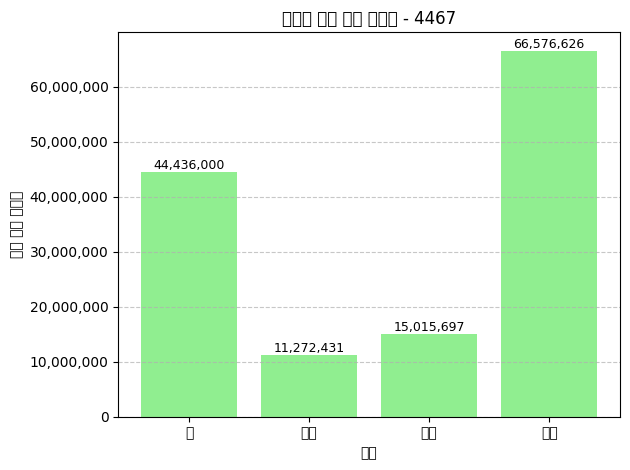

     YEAR MON        EUS       GUS           WUS           HUS season  \
0    2015  01  193784708  59133720  12819757.886  22740838.937     겨울   
1    2015  02  189974230  56487358  12656888.218  18793320.213     겨울   
2    2015  03  175215719  49984873  12655474.249  13826348.508      봄   
3    2015  04  183891769  37306841  12954773.246   5836002.885      봄   
4    2015  05  177289769  22060892  13086734.214   1320895.801      봄   
..    ...  ..        ...       ...           ...           ...    ...   
115  2024  08  463971328   7072251    15873544.6    130082.263     여름   
116  2024  09  409872908   5729131    15143321.6   3420507.136     가을   
117  2024  10  282268119   8233421    15297669.9   2695491.396     가을   
118  2024  11  257927956  17418221    14678672.5   8836296.454     가을   
119  2024  12  134828126  42103424     7326853.6   1513199.277     겨울   

     total_GUS_energy  
0          59133720.0  
1          56487358.0  
2          49984873.0  
3          37306841.0  
4  

In [51]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


responses = []    # API Request json 수집용 리스트

def get_year_months():
  year_months = []
  for year in range(2015, 2024+1):
    for month in range(1,12+1):
      year_months.append(f'{year}{month:02d}')

  #print("생성된 연도-월 목록:")
  #print(year_months)
  #print(f"총 {len(year_months)}개 (2015.01 ~ 2024.12)")
  return year_months

def get_responses():

  # 기간중의 모든 응답결과 중 list_total_count 체크한 결과 7이였으므로 , 5보다 큰 10으로 변경하였음
  base_url = f'http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/10'

  success_count = 0 # API Request 성공건수
  fail_count = 0    # API Request 실패건수

  for year_month in get_year_months():
    url = f'{base_url}/{year_month[:4]}/{year_month[4:]}'

    try:
      response = requests.get(url)
      response.raise_for_status()
      data = response.json()

      responses.append(data)
      # print(f"{year_month} 데이터 수집 완료")

    except requests.exceptions.RequestException as e:
      print(f"{year_month} API 호출 실패: {e}")
    except json.JSONDecodeError as e:
      print(f"{year_month} JSON 파싱 실패: {e}")

    if response.status_code == 200:
      # print("api 호출 성공")
      # print(response.json())
      success_count += 1
    else:
      # print(f"API 호출 실패: {response.status_code}")
      fail_count += 1

  # 결과 확인용
  if responses:

      # 전체 결과들의 list_total_count 값 확인하여 파라미터변경 필요여부 확인코드(모든 결과가 7건씩이였음)
      # total_counts = [
      # r.get('energyUseDataSummaryInfo', {}).get('list_total_count', None)
      #   for r in responses
      # ]
      # print("list_total_count 목록:", total_counts)
    print(f"총 요청 수: {len(responses)}건")
    print(f"성공 건수: {success_count}건")
    print(f"실패 건수: {fail_count}건")

    return responses


def main():

    personal_data = []
    # responses = get_responses()
    with open('APIdata.json', 'r', encoding='utf-8') as f:
      responses = json.load(f)
    for r in responses:
      info = r.get("energyUseDataSummaryInfo", {})
      result = info.get("RESULT", {})
      code = result.get("CODE", "UNKNOWN")

      if code == "INFO-000":  # 정상인경우
        rows = info.get("row", [])
        for row in rows:
          # 개인 유형만 추출
          if row.get("MM_TYPE") == "개인":
              personal_data.append({
                  "YEAR": row.get("YEAR"),
                  "MON": row.get("MON"),
                  "EUS": row.get("EUS"),  #전기사용량(EUS)
                  "GUS": row.get("GUS"),  #가스사용량(GUS)
                  "WUS": row.get("WUS"),  #수도사용량(WUS)
                  "HUS": row.get("HUS"),  #지역난방(HUS)
              })
      else:
        print


    print(f"‘개인’ 유형 데이터 수집 성공 건수: {len(personal_data)}건\n") # 기대치 120건

    # DataFrame 변환
    df = pd.DataFrame(personal_data)

    # 계절추가
    df['season'] = df['MON'].apply(get_season)

    # 막대 그래프 생성
    create_bar_chart(df)

    # 결과 출력
    print(df)


# 계절 함수
def get_season(month):
  if month in ['03', '04', '05']:
      return '봄'
  elif month in ['06', '07', '08']:
      return '여름'
  elif month in ['09', '10', '11']:
      return '가을'
  else:  # '12', '01', '02'
      return '겨울'


# 계절별 가스 사용량 평균을 막대 그래프로 시각화하고, 각 막대에 구체적인 수치를 표시
def create_bar_chart(df):
  student_id_last4 = "4467"  # 자신의 학번 뒤 4자리

  # 계절별 가스 평균 사용량 계산
  df['total_GUS_energy'] = df['GUS'].astype(float)
  season_avg = df.groupby('season')['total_GUS_energy'].mean().reset_index()

  # 원하는 계절 순서로 정렬
  season_order = ['봄', '여름', '가을', '겨울']
  season_avg['season'] = pd.Categorical(season_avg['season'], categories=season_order, ordered=True)
  season_avg = season_avg.sort_values('season')

  x = season_avg['season']
  y = season_avg['total_GUS_energy']

  ax = plt.gca()
  bars = ax.bar(x, y, color='lightgreen')

  # 막대 위에 수치 표시
  for bar in bars:
      height = bar.get_height()
      ax.text(bar.get_x() + bar.get_width()/2, height, f'{int(height):,}',
              ha='center', va='bottom', fontsize=9)

  # 축 및 제목
  plt.title(f'계절별 가스 평균 사용량 - {student_id_last4}')
  plt.xlabel('계절')
  plt.ylabel('평균 가스 사용량 (도시가스 ㎥)')
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))


  # 천 단위 콤마 적용
  ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))

  plt.tight_layout()


  # 그래프
  plt.show()

if __name__ == "__main__":
    main()